In [33]:
from manim import *
config.media_embed = True
param= "-v WARNING  --progress_bar None --format=gif  -r  500,200  --disable_caching Example"
# param= "-v WARNING  --progress_bar None   -r  500,200 --fps=23 --disable_caching Example"

In [34]:
dispersion = "high" # "high", "low", "const"
def n(wj):
    if dispersion == "high":
        return 1 + wj * 0.1
    if dispersion == "low":
        return 1.1 - wj * 0.01
    if dispersion == "const":
        return 1

c = 1
num_of_waves = 121
start_w = 1
end_w = 7
x = np.linspace(-2, 10, 1001)

def g(x, t):
    u1 = 0
    for wj in np.linspace(start_w, end_w, num_of_waves):
        u1 += np.exp(1j * (wj * n(wj) / c * x - t * wj))
    return u1.real


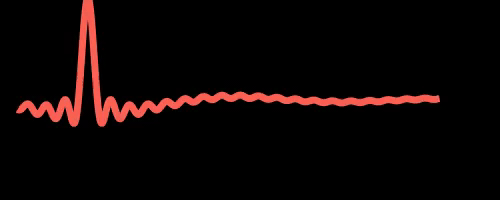

In [35]:
#| label: my-wave1

class Example(Scene):
    def construct(self):

        def update_func(mob):
            new_mob = ParametricFunction(lambda x: [x, g(x,tr_amplitude.get_value())*0.024, 0], t_range=[-2, 10],stroke_width=20, color=RED).to_edge(LEFT)
            mob.become(new_mob)


        amp1 = 0
        amp2 = 10
        tr_amplitude = ValueTracker(0)

        function = ParametricFunction(lambda x: [x, g(x,1)*0.024, 0], t_range=[-2, 10],stroke_width=20, color=RED).to_edge(LEFT)
        function.add_updater(update_func)

        self.add(function.move_to(ORIGIN))
        self.play(tr_amplitude.animate.set_value(amp2), rate_func=linear, run_time=5.0)

%manim $param 